## problem Statement

Build a Machine Learning model that:

Automatically classifies customer support tickets into categories
(e.g., Billing, Technical Issue, Account, General Query)

Assigns a priority level (High / Medium / Low)

Uses NLP techniques for text preprocessing and feature extraction

## Objective

Classify support tickets into categories (Hardware, Access, etc.)

Apply NLP preprocessing

Train a machine learning model

Evaluate performance using metrics

# support ticket classification using NLP
## 1.Import Libraries 

In [14]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2.Dataset loading and verification

In [15]:
import os
os.listdir()

['.ipynb_checkpoints',
 'customer support tickets',
 'dataset of task 2.zip',
 'support_ticket_classification.ipynb']

In [16]:
import os
os.listdir("customer support tickets")

['all_tickets_processed_improved_v3.csv']

## 3.load dataset and data exploration

In [17]:
df = pd.read_csv("customer support tickets/all_tickets_processed_improved_v3.csv")
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [18]:
# Download stopwords (run once)
import nltk
nltk.download('stopwords', quiet=True)

from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['clean_text'] = df['Document'].apply(clean_text)

df[['Document', 'clean_text']].head()

,Document,clean_text
0,connection with icon icon dear please setup ic...,connection icon icon dear please setup icon pe...
1,work experience user work experience user hi w...,work experience user work experience user hi w...
2,requesting for meeting requesting meeting hi p...,requesting meeting requesting meeting hi pleas...
3,reset passwords for external accounts re expir...,reset passwords external accounts expire days ...
4,mail verification warning hi has got attached ...,mail verification warning hi got attached plea...


## Text PreProcessing

In this step,the raw ticket text is cleaned using:

-Lowercasing

-Removing punctuation and numbers

-Removing stopwords 

This helps in improving model performance by reducing noise and focusing on meaningful words.

In [19]:
df.columns

Index(['Document', 'Topic_group', 'clean_text'], dtype='object')

# 4.feature and target selection

In [20]:
x = df["Document"]
y = df["Topic_group"]

print(x.shape)
print(y.shape)

(47837,)
(47837,)


## 5.train-test split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.2, random_state=42)
print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

Train size: (38269,)
Test size: (9568,)


## 6.text vectorization(TF-IDF)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)

(38269, 11414)
(9568, 11414)


## 7.model training(Logistic regression)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)
print("Model trained successfully!")

Model trained successfully!


## 8. model prediction

In [24]:
y_pred = model.predict(x_test_tfidf)
print("Prediction completed!")

Prediction completed!


## 9.model evaluation

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8453177257525084

Classification Report:

                       precision    recall  f1-score   support

               Access       0.92      0.87      0.89      1455
Administrative rights       0.88      0.68      0.77       342
           HR Support       0.84      0.83      0.84      2107
             Hardware       0.79      0.88      0.83      2760
     Internal Project       0.91      0.80      0.85       451
        Miscellaneous       0.80      0.82      0.81      1400
             Purchase       0.97      0.88      0.92       497
              Storage       0.93      0.84      0.88       556

             accuracy                           0.85      9568
            macro avg       0.88      0.83      0.85      9568
         weighted avg       0.85      0.85      0.85      9568



## 10.confusion matrix visualization

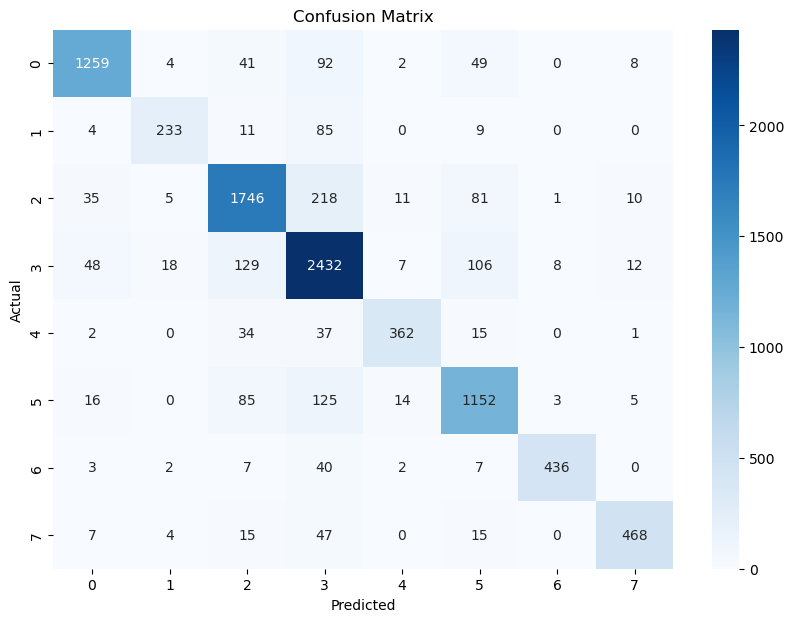

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 ## Business Insights

The model achieves 84.5% accuracy in classifying support tickets.

Most categories such as Purchase, Access, and Storage show strong precision and recall.

This system can help automatically route tickets to the correct department.

It reduces manual effort and improves response time.

## 11.priority assignment logic

In [27]:
def assign_priority(text):
    text = text.lower()
    if "urgent" in text or "immediately" in text or "asap" in text:
        return "High"
    elif "error" in text or "issue" in text:
        return "Medium"
    else:
        return "Low"

df["Priority"] = df["Document"].apply(assign_priority)

df[["Document", "Topic_group", "Priority"]].head()

,Document,Topic_group,Priority
0,connection with icon icon dear please setup ic...,Hardware,Low
1,work experience user work experience user hi w...,Access,Low
2,requesting for meeting requesting meeting hi p...,Hardware,Low
3,reset passwords for external accounts re expir...,Access,Medium
4,mail verification warning hi has got attached ...,Miscellaneous,Low


## 12. Conclusion

This project successfully builds an NLP-based Support Ticket Classification system using TF-IDF and Logistic Regression.

The model achieves ~84.5% accuracy and can automatically:
- Classify support tickets
- Route tickets to correct departments
- Assign priority levels

This system can reduce manual effort and improve response time in IT support operations.